# Define Libraries 

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms 

# Read Img

In [2]:
img = cv2.imread("pout.jpg") # loading the Image

# convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# Normal Histogram Of Image 

(293, 242)


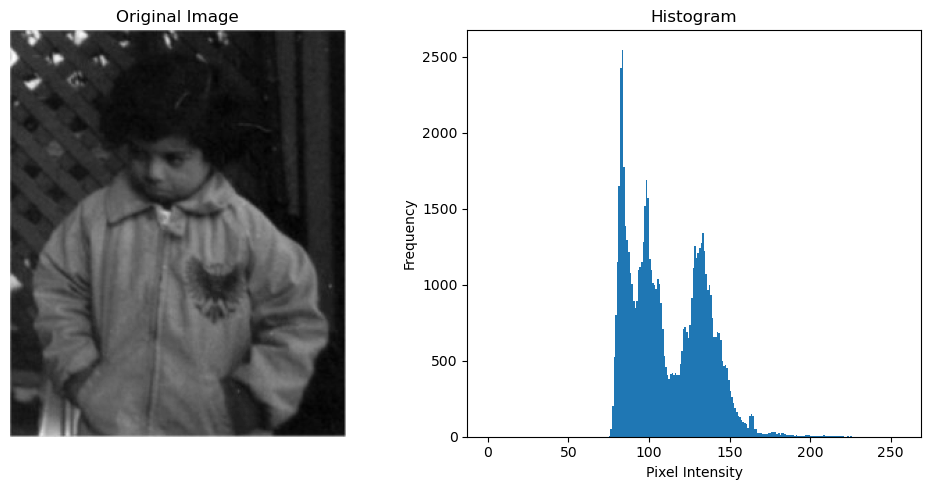

In [3]:

plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)  # First subplot
plt.imshow(gray_img, cmap='gray') 
plt.title("Original Image")  # Title for the image
plt.axis('off')  # Remove axes for better visualization

# Display the histogram
plt.subplot(1, 2, 2)  # Second subplot
plt.hist(gray_img.ravel(), 256, [0, 256])  # Compute and plot the histogram
plt.title("Histogram")  # Title for the histogram
plt.xlabel("Pixel Intensity")  # X-axis label
plt.ylabel("Frequency")  # Y-axis label

print(gray_img.shape)
plt.tight_layout()
plt.show()


# Histogram Equalization

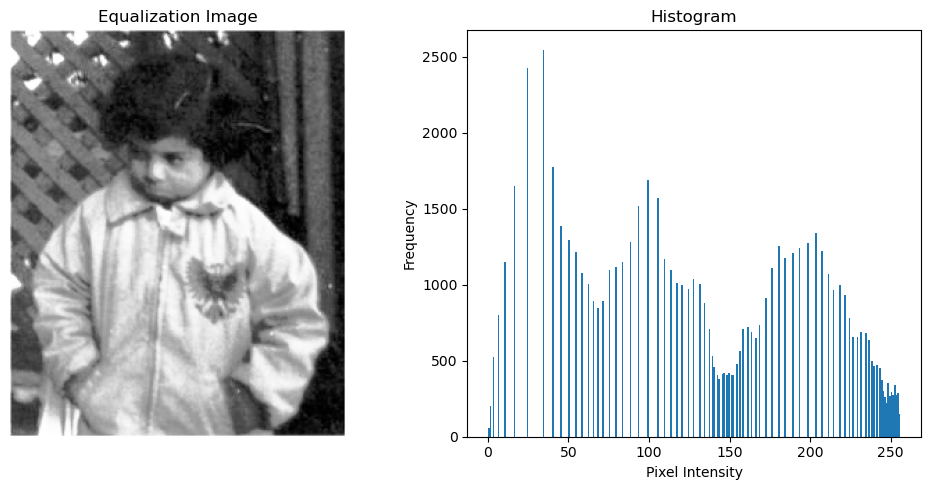

In [4]:
equ_img = cv2.equalizeHist(gray_img)
# Create a figure with two subplots (side by side)
plt.figure(figsize=(10, 5))

# Display the Equalization image
plt.subplot(1, 2, 1)
plt.imshow(equ_img , cmap='gray')
plt.title("Equalization Image")
plt.axis('off')  

# Display the histogram
plt.subplot(1, 2,2)
plt.hist(equ_img.ravel(),256,[0,256])
plt.title("Histogram")
plt.xlabel("Pixel Intensity")  
plt.ylabel("Frequency") 

plt.tight_layout()
plt.show()

# Histogram Specification

In [5]:
#create a 2D matrix with decreasing pixel intensities

target_values = np.linspace(255, 0, 32)  #generates 32 values that decrease from 255 to 0
repeated_values = []
for value in target_values:
    repeat_count = int((255 - value) / 16)  #dividing by 16 controls the degree of repetition
    repeated_values.extend([value] * repeat_count)
rows, cols = gray_img.shape
matrix = np.tile(repeated_values, (rows, cols ))[:, :cols].astype(np.uint8) 

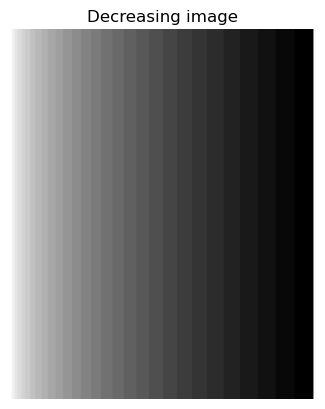

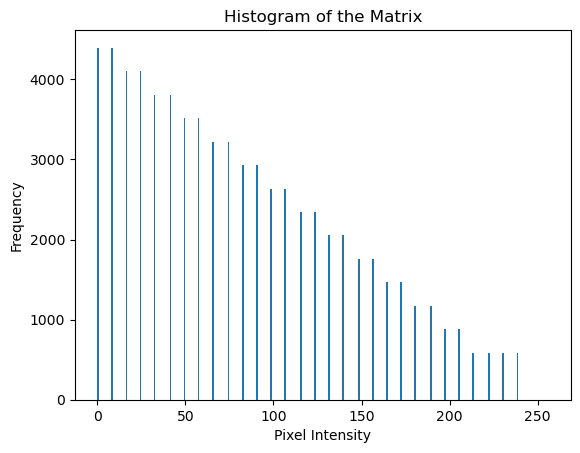

' إذا أردت زيادة التكرار للقيم الصغيرة، استخدم رقمًا أصغر مثل 8 أو 4.\nإذا أردت تقليل التكرار للقيم الصغيرة، استخدم رقمًا أكبر مثل 32 أو 64. '

In [6]:
# display the target image
plt.imshow(matrix, cmap='gray')
plt.title('Decreasing image')
plt.axis('off')
plt.show()
# display the target histogram
plt.hist(matrix.ravel(), 256, [0, 256])
plt.title('Histogram of the Matrix')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()
""" إذا أردت زيادة التكرار للقيم الصغيرة، استخدم رقمًا أصغر مثل 8 أو 4.
إذا أردت تقليل التكرار للقيم الصغيرة، استخدم رقمًا أكبر مثل 32 أو 64. """

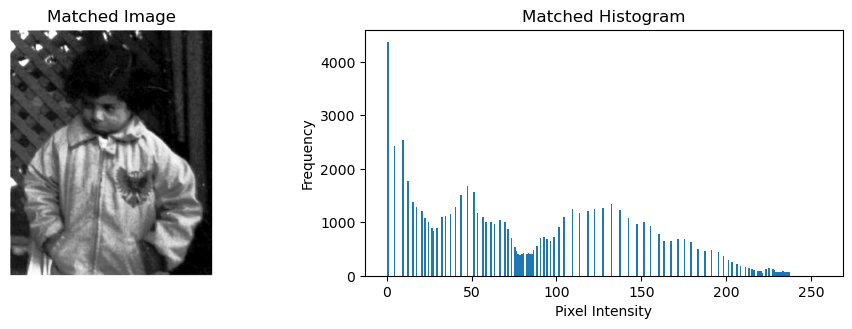

In [7]:
matched_img = match_histograms(gray_img, matrix)
plt.figure(figsize=(10, 6))

# display the matched image
plt.subplot(2, 2, 3)
plt.imshow(matched_img, cmap='gray')
plt.title('Matched Image')
plt.axis('off')

# display the matched image
plt.subplot(2, 2, 4)
plt.hist(matched_img.ravel(), 256, [0, 256])
plt.title('Matched Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Comparisions Between All Histogram

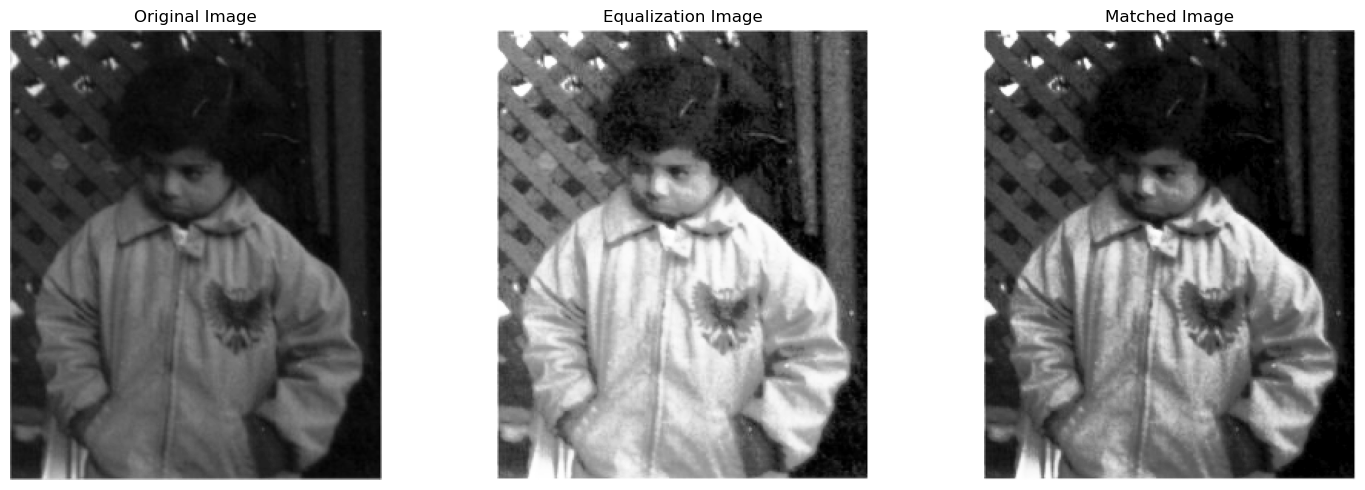

In [48]:
plt.figure(figsize=(15, 5))

# dsisplay the original image
plt.subplot(1, 3, 1)
plt.imshow(gray_img, cmap='gray') 
plt.title("Original Image")  # Title for the image
plt.axis('off') 

# display the equalized image
plt.subplot(1, 3, 2)
plt.imshow(equ_img , cmap='gray')
plt.title("Equalization Image")
plt.axis('off')  

# display the matched image
plt.subplot(1, 3, 3)
plt.imshow(matched_img, cmap='gray')
plt.title('Matched Image')
plt.axis('off')

plt.tight_layout()
plt.show()